## 1. Load the data from “cereal.csv” and plot histograms of sugar and vitamin content across different cereals.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cereals = pd.read_csv('C:\\Users\\215518\\Desktop\\New folder\\cereal.csv')

In [3]:
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


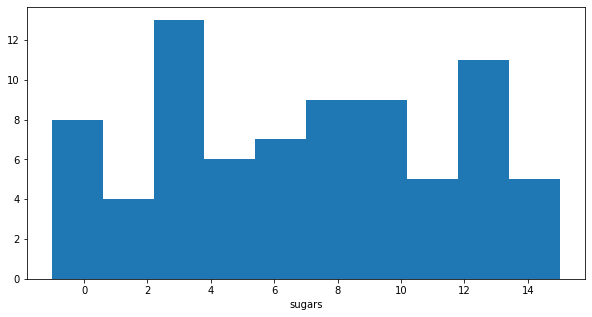

In [4]:
plt.figure(figsize=(10, 5))
plt.hist(x=cereals['sugars'], align = 'mid')
plt.xlabel('sugars')
plt.show()

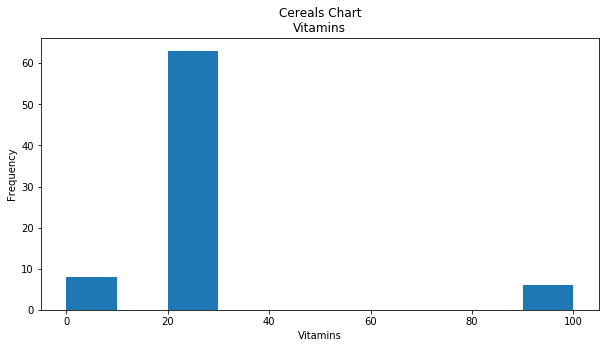

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(x=cereals['vitamins'], align = 'mid')
plt.title('Cereals Chart\nVitamins')
plt.xlabel('Vitamins')
plt.ylabel('Frequency')
plt.show()

## 2. The names of the manufactures are coded using alphabets, create a new column with their full name using the below mapping.

In [6]:
man = {'N': 'Nabisco','Q': 'Quaker Oats','K': 'Kelloggs','R': 'Raslston Purina','G': 'General Mills',
                                'P' :'Post','A':'American Home Foods Products'}

In [7]:
cereals['manufacturer'] = cereals['mfr'].map(man)

In [8]:
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,manufacturer
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina


## Create a bar plot where each manufacturer is on the y axis and the height of the bars depict the number of cereals manufactured by them.

In [9]:
cereals['manufacturer'][:]

0             Nabisco
1         Quaker Oats
2            Kelloggs
3            Kelloggs
4     Raslston Purina
           ...       
72      General Mills
73      General Mills
74    Raslston Purina
75      General Mills
76      General Mills
Name: manufacturer, Length: 77, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  


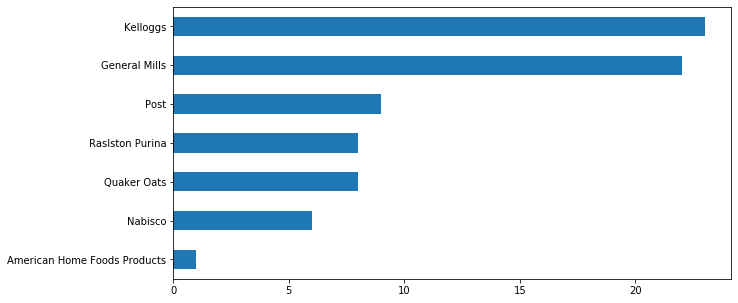

In [10]:
plt.figure(figsize=(10, 5))
cereals['manufacturer'].value_counts().plot('barh').invert_yaxis()

## 3. Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’. Separate 25% of your data as test set.

In [11]:
x = cereals.iloc[:,3:15] ## predictors or features
y = cereals['rating'] ## output or target variale

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)

In [14]:
x_test.shape

(20, 12)

## 4. Fit a linear regression module and measure the mean squared error on test dataset.

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_test,y_test)

In [26]:
model.score(x_test, y_test) ## R^2 value

0.9999999999999997

In [27]:
pred = model.predict(x_test) #predicted value

In [28]:
pred

array([39.24111401, 31.43597307, 18.04285122, 39.70339993, 39.10617404,
       34.139765  , 28.02576486, 32.20758164, 35.78279084, 29.92428518,
       19.82357303, 28.74241376, 49.78744506, 53.37100683, 40.40020797,
       72.801787  , 40.69232   , 36.18755888, 59.36399323, 33.17409445])

In [29]:
y_test #actual value

40    39.241114
25    31.435973
10    18.042851
59    39.703400
72    39.106174
45    34.139765
29    28.025765
24    32.207582
17    35.782791
48    29.924285
12    19.823573
37    28.742414
74    49.787445
33    53.371007
13    40.400208
65    72.801787
49    40.692320
76    36.187559
68    59.363993
6     33.174094
Name: rating, dtype: float64

In [30]:
from sklearn import metrics
print('Mean squared error : ', metrics.mean_squared_error (y_test, pred))

Mean squared error :  3.127048090654767e-14
